### Titanic Tutorial Part 2



In [59]:
# import required libraries

import pandas as pd
import yellowbrick
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
# load the titanic datasset

df = pd.read_csv('train.csv')

In [81]:
# view the dataset
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log1p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,2.639057
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3.433987
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3.196630
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3.433987


### Fill in missing values and eliminate features

In [62]:
#fill the missing Fare data with median value
def fill_na_median(df, inplace=True):
    return df.fillna(df.median(), inplace=inplace)
fill_na_median(df['Fare'])

In [63]:
# check above result
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [64]:
# fill with the most represented value
def fill_na_most(df, inplace=True):
    return df.fillna('S', inplace=inplace)

fill_na_most(df['Embarked'])


In [65]:
# check the result
print(df['Embarked'].describe())


count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object


In [66]:
# log-transformation
def log_transformation(df):
    return df.apply(np.log1p)
df['Fare_log1p'] = log_transformation(df['Fare'])

In [67]:
# check the data
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log1p
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


### Adjust skewed data (fare)

In [68]:
#check the distribution using histogram
# set up the figure size

plt.rcParams['figure.figsize'] = (10, 5)


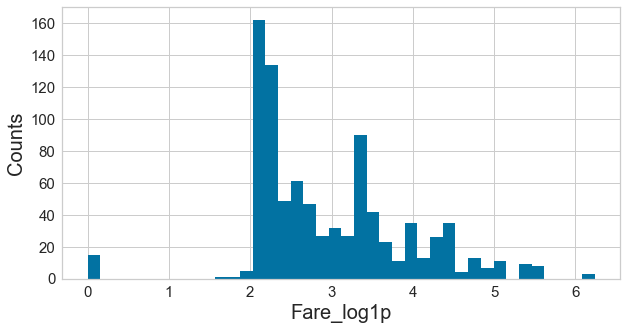

In [70]:
plt.hist(df['Fare_log1p'], bins=40)
plt.xlabel('Fare_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()


### Convert categorical data to numbers

In [78]:
# Retrieve the categorical data
cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = df[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})


In [79]:
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)

In [80]:
# check the data
data_cat_dummies.head(8)

,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1
5,0,0,1,0,1,0,1,0
6,1,0,0,0,1,0,0,1
7,0,0,1,0,1,0,0,1
